In [1]:
from trajectories import *
from simplicial_paths import *

# Initialize Simplicial Complex

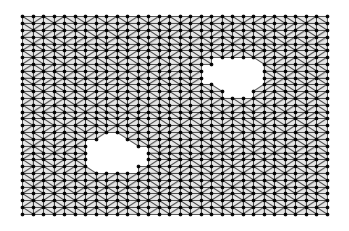

In [2]:
n_side, point_gen_mode = 15, 0
hole_locs = [(0.4, 0.4), (-0.4, -0.4)]
r = 0.18

#np.random.seed(1)
pts = generate_pts(point_gen_mode, n_side)
SC = SimplicialComplex(pts)
all_faces = np.arange(SC.face_vec.shape[0])
faces_to_add = {2:set(all_faces)}
SC.add_simplices(faces_to_add)
SC.make_holes(hole_locs, r)
SC.plot()

# Loops around bottom hole

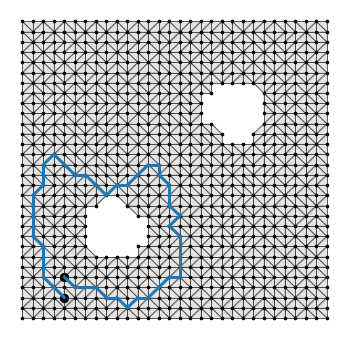

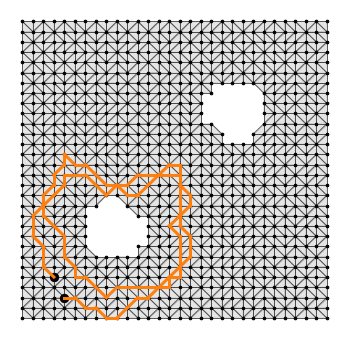

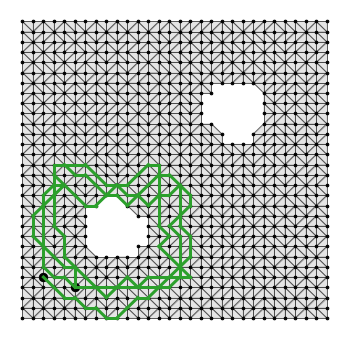

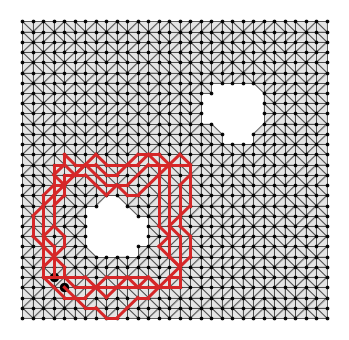

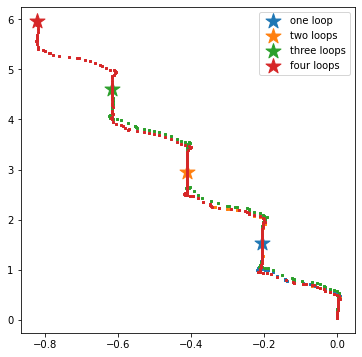

In [3]:
trajectory_classes = []

coords1 = [(-0.75,-0.75), (0,-0.75), (0, 0), (-0.75, 0), (-0.75,-0.75)]
coords2 = coords1 + coords1[1:]
coords3 = coords2 + coords1[1:]
coords4 = coords3 + coords1[1:]

coord_list = [coords1] + [coords2] + [coords3] + [coords4]
num_paths, num_nodes = 1, 10


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
class_names = ["one loop", "two loops", "three loops", "four loops"]

for coords in coord_list:
    traj = Trajectory(SC, coords, num_paths, num_nodes)
    trajectory_classes.append(traj)

for i, trajectory in enumerate(trajectory_classes):
    plt.figure(figsize=(6,6))
    SC.plot_trajectories(trajectory.all_trajectories, colors[i])
    plt.show()

plt.figure(figsize=(6,6))
for i, trajectory in enumerate(trajectory_classes):
    trajectory.plot_trajectory_proj(class_names[i], colors[i])

plt.legend()
plt.show()


# Compressible loop paths 

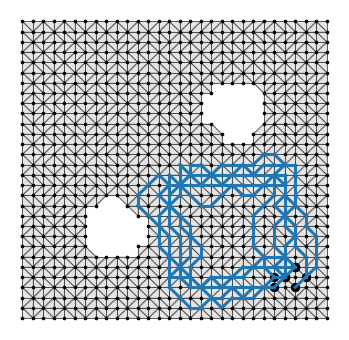

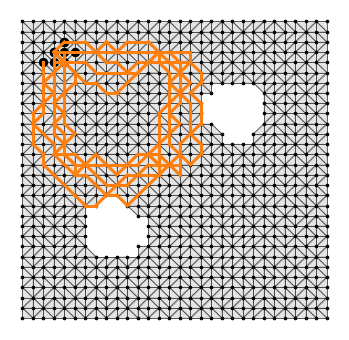

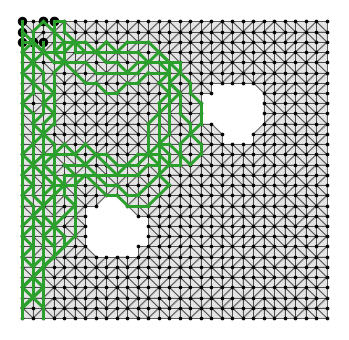

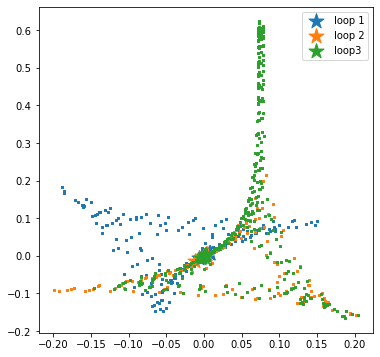

In [4]:
trajectory_classes = []

coords1 = [(0.75,-0.75), (0.75,0), (0, 0), (0, -0.75), (0.75,-0.75)]
coords2 = [(-0.75,0.75), (-0.75,0), (0, 0), (0, 0.75), (-0.75,0.75)]
coords3 = [(-1,1), (-1, -1), (-0.8, 0), (0,0), (0, 0.75), (-0.75,0.75), (-1, 1)]

coord_list = [coords1] + [coords2] + [coords3] # + [coords4]
num_paths, num_nodes = 5, 10

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
class_names = ["loop 1", "loop 2", "loop3"]

for coords in coord_list:
    traj = Trajectory(SC, coords, num_paths, num_nodes)
    trajectory_classes.append(traj)

for i, trajectory in enumerate(trajectory_classes):
    plt.figure(figsize=(6,6))
    SC.plot_trajectories(trajectory.all_trajectories, colors[i])
    plt.show()

plt.figure(figsize=(6,6))
for i, trajectory in enumerate(trajectory_classes):
    trajectory.plot_trajectory_proj(class_names[i], colors[i])

plt.legend()
plt.show()

# Plotting paths of different homotopy types

In [5]:
num_paths, num_nodes = 10, 10
trajectory_classes = []

coords1 = [[(-0.75,-0.75), (0,-0.75), (0,0), (0,0.75), (0.75,0.75)]] # below
coords2 = [[(-0.75,-0.75), (-0.75,0.5), (0.75,0.75)]] # above 
coords3 = [[(-0.75,-0.75), (0.5,-0.75), (0.75,0.75)]] # 
coords4 = [[(-0.75,-0.75), (0.75,-0.75), (0.75,0.75), (-0.75,0.75), (-0.75,-0.75)]]
coords5 = [[(-0.75,0.75), (0,0), (0.75,-0.75)]]
coords6 = [[(-0.75,0.75), (-0.75,0), (0, 0), (0, 0.75), (-0.75,0.75)]]

coord_list = coords1 + coords2 + coords3 + coords4 + coords5 + coords6

for coords in coord_list:
    traj = Trajectory(SC, coords, num_paths, num_nodes)
    trajectory_classes.append(traj)

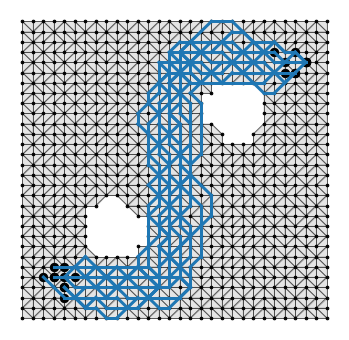

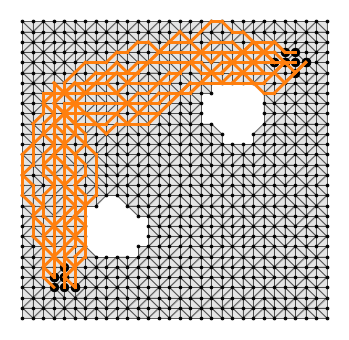

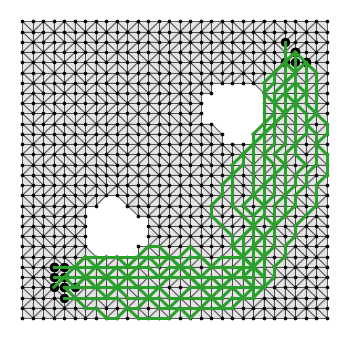

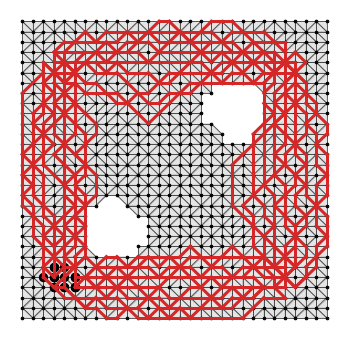

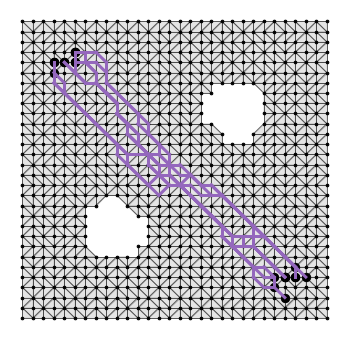

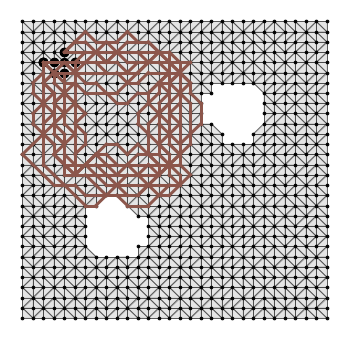

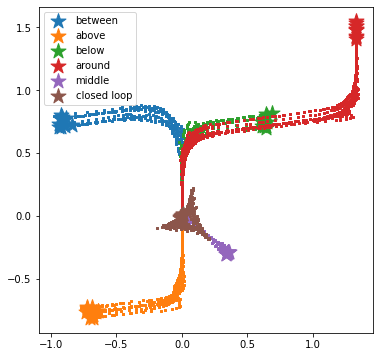

In [6]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
class_names = ["between", "above", "below", "around", "middle", "closed loop"]

for i, trajectory in enumerate(trajectory_classes):
    plt.figure(figsize=(6,6))
    SC.plot_trajectories(trajectory.all_trajectories, colors[i])
    plt.show()

plt.figure(figsize=(6,6))
for i, trajectory in enumerate(trajectory_classes):
    trajectory.plot_trajectory_proj(class_names[i], colors[i])

plt.legend()
plt.show()
 

# Augmented Dijkstra

In [ ]:
def compute_edge_proj(SC, edge):
    e1, e2 = edge
    parity = -2 * int(e1 > e2) + 1
    x_vec = np.zeros_like(SC.edge_vec)
    edge_idx = SC.edges.index(actual_edge)
    x_vec[edge_idx] += parity
    proj = SC.harm_proj(x_vec)
    return proj

def augmented_dijkstra(SC, init_node, goal_node, ref_proj, alpha):
    """
    G: Graph from simplicial complex
    v_init: starting node
    ref_proj: projection of reference path
    alpha: regularization parameter
    """
    num_holes = SC.num_holes
    G = SC.graph
    prev = np.zeros(len(G))
    dist = np.ones(len(G)) * np.inf
    proj = np.zeros((len(G), num_holes)) * np.inf

    dist[init_node] = 0

    Q_set = list(np.where(SC.node_vec != 0)[0])

    while len(Q_set) > 0:
        curr_node = np.argmin(dist)
        if curr_node == goal_node:
            break
        if dist[curr_node] == np.inf: # if only inactive (hole) nodes remain
            break

        Q_set.remove(curr_node)

        for next_node in G.neighbors(curr_node):
            if next_node not in Q_set:
                continue 

            edge = (curr_node, next_node)
            tot_proj = proj[curr_node] + compute_edge_proj(SC, edge)
            diff_proj = np.linalg.norm(tot_proj - ref_proj)**2
            alt_dist = dist[curr_node] + G[curr_node][next_node] + alpha * diff_proj
            
            if alt_dist < dist[next_node]:
                dist[next_node] = alt_dist
                proj[next_node] = tot_proj
                prev[next_node] = curr_node

    final_trajectory = []

    curr_node = goal_node
    while curr_node != init_node:
        final_trajectory = [curr_node] + final_trajectory
        curr_node = prev[curr_node]

    final_trajectory = [goal_node] + final_trajectory    

    return final_trajectory

In [ ]:
"""v_init = 1
Q = np.where(SC.node_vec != 0)[0]
ones = np.ones_like(Q)
Q = np.vstack([Q, np.inf*ones, -1*ones]).T
Q_ind = np.ones(Q.shape[0], dtype=int)
v_init_idx = np.where(Q[:,0] == 2)[0][0]
Q_ind[v_init_idx] = 0
Q_prime = np.array([q for i, q in enumerate(Q) if Q_ind[i] != 0])
ind = np.argsort( Q_prime[:,1] )
Q_prime = Q_prime[ind]
Q_prime"""

In [ ]:
"""# Next: implement modified Dijkstra algorithm (implemented as dynamic programming) 
from copy import deepcopy

def update_Q(Q, Q_ind):
    Q_prime = np.array([q for i, q in enumerate(Q) if Q_ind[i] != 0])
    return Q_prime

def path_reg_cost(SC, curr_edge_vec, edge, ref_path, alpha):
    pass

def path_planning(SC, v_init, v_end, alpha):
    Q = np.where(SC.node_vec != 0)[0]
    ones = np.ones_like(Q)
    Q = np.vstack([Q, np.inf*ones, -1*ones]).T
    Q_ind = np.ones(Q.shape[0], dtype=int)
    v_init_idx = np.where(Q[:,0] == v_init)[0][0]
    Q[v_init_idx, 1] = 0

    G = deepcopy(SC.graph)

    while np.sum(Q_ind) > 0:
        print("q_ind sum =", np.sum(Q_ind))
        Q_prime = update_Q(Q, Q_ind)
        ind = np.argsort( Q_prime[:,1] )
        Q_prime = Q_prime[ind]
        u = Q_prime[0,0]
        u_idx = np.where(Q[:,0] == u)[0][0]
        Q_ind[u_idx] = 0

        for v in G.neighbors(u):
            v_idx = np.where(Q[:,0] == v)[0][0]
            if Q_ind[v_idx] == 0:
                continue
            alt = G[u][v] + alpha * 
"""

